In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
generic_dat = pd.read_csv('csvnormal_heart.csv')#('csv_tumorAdiposevolume.csv')
generic_dat.rename(columns=generic_dat.iloc[0])
generic_dat = generic_dat[0:]
#generic_dat.drop(['Name', 'ID', 'Date'], inplace=True, axis=1)
generic_dat.reset_index()
generic_dat['subc_ml_vol'] = generic_dat['Vol_ml'] - generic_dat['Vol_ml_vat']
generic_dat

,Name,Suvmax_heart,Vol_ml_heart,Vol_mean_heart,SUVMean_heart,SD_heart,Alive,Male,Race,Age,...,Vol_ml_vat,Vol_mean_vat,SUVMean_vat,SD_vat,SuvMax_tumor,Vol_ml_tumor,Vol_mean_tumor,SUVMean_tumor,SUVsd_tumor,subc_ml_vol
0,TCGA-60-2695,3.92,5.68,13.89,2.45,0.48,1,0,White,74,...,584.00,397.30,0.68,0.31,12.18,15.59,100.58,6.45,3.00,957.41
1,TCGA-60-2696,12.72,10.78,89.08,8.27,2.29,0,0,Black,76,...,69.12,46.59,0.67,0.25,20.61,31.97,358.74,11.22,5.88,576.03
2,TCGA-60-2715,2.24,9.34,16.78,1.80,0.18,0,1,White,52,...,35.28,30.73,0.87,0.46,4.91,1.87,5.30,2.83,0.79,18.25
3,TCGA-60-2719,2.66,9.63,19.76,2.05,0.21,1,0,White,83,...,283.67,211.43,0.75,0.38,15.28,26.87,237.81,8.85,3.33,543.92
4,TCGA-60-2721,4.01,8.55,21.52,2.52,0.51,1,1,White,74,...,229.71,211.99,0.92,0.36,14.58,40.17,278.65,6.94,3.45,448.86
5,TCGA-60-2722,2.04,21.20,11.43,0.54,0.27,1,1,White,66,...,318.74,193.86,0.61,0.31,10.95,22.42,130.24,5.81,2.51,851.46


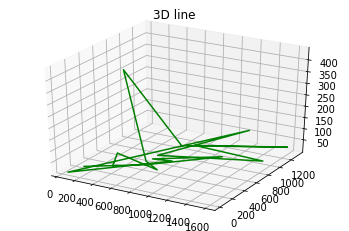

In [3]:
fig = plt.figure() 
ax = plt.axes(projection ='3d') 
z = generic_dat['Vol_ml_tumor']
x = generic_dat['Vol_ml']
y = generic_dat['subc_ml_vol']
 
ax.plot3D(x, y, z, 'green') 
ax.set_title('3D line') 
plt.show() 

No trend

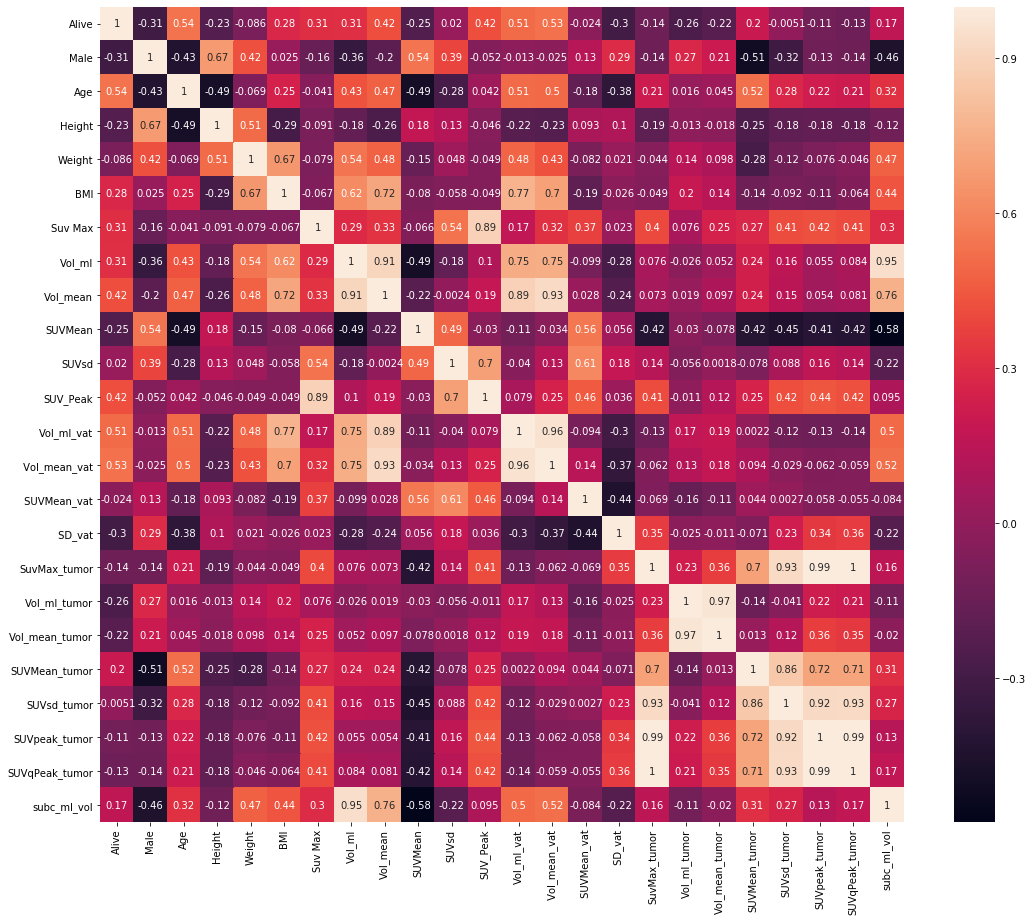

In [3]:
plt.figure(figsize=(18, 15))
sns.heatmap(generic_dat.corr(), annot=True)

In [6]:
generic_dat['perc_vat'] = (generic_dat['Vol_ml_vat'] / generic_dat['Vol_ml'])*100
generic_dat['perc_sub'] = (generic_dat['subc_ml_vol'] / generic_dat['Vol_ml'])*100

In [15]:
generic_dat.columns

Index(['Name', 'Suvmax_heart', 'Vol_ml_heart', 'Vol_mean_heart',
       'SUVMean_heart', 'SD_heart', 'Alive', 'Male', 'Race', 'Age', 'Stage',
       'Height', 'Weight', 'BMI', 'Suv Max', 'FFM', 'FM', 'WBM', 'Vol_ml',
       'Vol_mean', 'SUVMean', 'SUVsd', 'Vol_ml_vat', ' Vol_mean_vat',
       ' SUVMean_vat', ' SD_vat', 'SuvMax_tumor', 'Vol_ml_tumor',
       'Vol_mean_tumor', 'SUVMean_tumor', 'SUVsd_tumor', 'subc_ml_vol',
       'perc_vat', 'perc_sub'],
      dtype='object')

In [8]:
generic_dat

,Name,Suvmax_heart,Vol_ml_heart,Vol_mean_heart,SUVMean_heart,SD_heart,Alive,Male,Race,Age,...,SUVMean_vat,SD_vat,SuvMax_tumor,Vol_ml_tumor,Vol_mean_tumor,SUVMean_tumor,SUVsd_tumor,subc_ml_vol,perc_vat,perc_sub
0,TCGA-60-2695,3.92,5.68,13.89,2.45,0.48,1,0,White,74,...,0.68,0.31,12.18,15.59,100.58,6.45,3.00,957.41,37.887389,62.112611
1,TCGA-60-2696,12.72,10.78,89.08,8.27,2.29,0,0,Black,76,...,0.67,0.25,20.61,31.97,358.74,11.22,5.88,576.03,10.713787,89.286213
2,TCGA-60-2715,2.24,9.34,16.78,1.80,0.18,0,1,White,52,...,0.87,0.46,4.91,1.87,5.30,2.83,0.79,18.25,65.906968,34.093032
3,TCGA-60-2719,2.66,9.63,19.76,2.05,0.21,1,0,White,83,...,0.75,0.38,15.28,26.87,237.81,8.85,3.33,543.92,34.276635,65.723365
4,TCGA-60-2721,4.01,8.55,21.52,2.52,0.51,1,1,White,74,...,0.92,0.36,14.58,40.17,278.65,6.94,3.45,448.86,33.852071,66.147929
5,TCGA-60-2722,2.04,21.20,11.43,0.54,0.27,1,1,White,66,...,0.61,0.31,10.95,22.42,130.24,5.81,2.51,851.46,27.238079,72.761921


In [2]:
from scipy import stats
from pingouin import multivariate_normality
from scipy.stats import kendalltau, spearmanr

In [14]:
multivariate_normality(generic_dat.drop(['Alive', 'Male', 'Race', 'Stage'], axis=1), alpha=.05)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

C:\Users\w\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


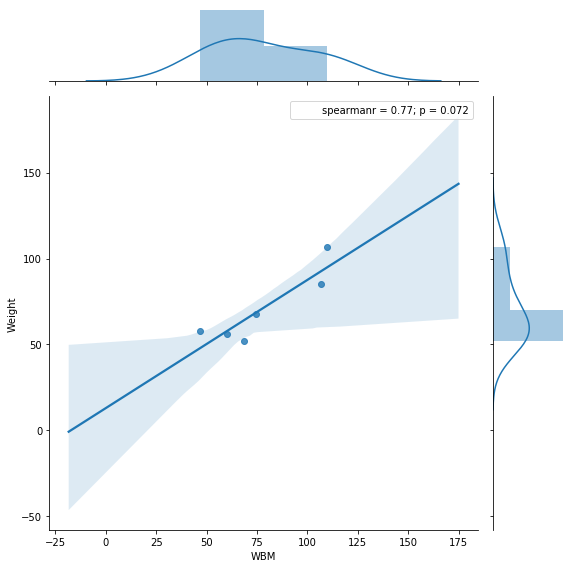

In [16]:
j = sns.jointplot('WBM', 'Weight', data = generic_dat, kind='reg', height=8)
j.annotate(stats.spearmanr)
plt.show()
#ok

In [19]:
corr, _ = kendalltau(generic_dat['BMI'], generic_dat['Suvmax_heart']) 
print('Kendall Rank correlation: %.5f' % corr) 

Kendall Rank correlation: -0.06667


In [26]:
spearmanr(generic_dat['FM'], generic_dat['Vol_ml_tumor'])

SpearmanrResult(correlation=0.27941176470588236, pvalue=0.2774303257912213)

In [18]:
corr, _ = kendalltau(generic_dat['perc_sub'], generic_dat['Vol_ml_tumor']) 
print('Kendall Rank correlation: %.5f' % corr) 

Kendall Rank correlation: 0.08824


In [19]:
corr, _ = kendalltau(generic_dat['FM'], generic_dat['Vol_ml_tumor']) 
print('Kendall Rank correlation: %.5f' % corr) 

Kendall Rank correlation: 0.22059


In [8]:
'''binary_data = generic_dat[['Alive', 'Male']]
normalized_data = pd.concat([normalized_data, binary_data], axis=1)
normalized_data
normalized_data = pd.concat([normalized_data])
replaced with the bottom code
'''
CATEGORICAL_VARIABLES = ["Alive", 
                       "Male"]

for c in CATEGORICAL_VARIABLES:
    if c not in ["Alive", "Male"]:
        correlation = stats.pearsonr(generic_dat[c], generic_dat["Vol_ml_vat"])
    else:
        correlation = stats.pointbiserialr(generic_dat[c], generic_dat["Vol_ml_vat"])
    print("Correlation of %s to VAT is %s" %(c, correlation))

Correlation of Alive to VAT is PointbiserialrResult(correlation=0.5105132805074124, pvalue=0.03626431837043889)
Correlation of Male to VAT is PointbiserialrResult(correlation=-0.013404855198064336, pvalue=0.9592764299109855)


In [14]:
for c in CATEGORICAL_VARIABLES:
    if c not in ["Alive", "Male"]:
        correlation = stats.pearsonr(generic_dat[c], generic_dat["perc_vat"])
    else:
        correlation = stats.pointbiserialr(generic_dat[c], generic_dat["perc_vat"])
    print("Correlation of %s to VAT is %s" %(c, correlation))

Correlation of Alive to VAT is PointbiserialrResult(correlation=0.06798826790104283, pvalue=0.795426853441619)
Correlation of Male to VAT is PointbiserialrResult(correlation=0.5053558294987653, pvalue=0.03851776129957234)


In [15]:
for c in CATEGORICAL_VARIABLES:
    if c not in ["Alive", "Male"]:
        correlation = stats.pearsonr(generic_dat[c], generic_dat["perc_sub"])
    else:
        correlation = stats.pointbiserialr(generic_dat[c], generic_dat["perc_sub"])
    print("Correlation of %s to SAT is %s" %(c, correlation))

Correlation of Alive to SAT is PointbiserialrResult(correlation=-0.06798826790104286, pvalue=0.795426853441619)
Correlation of Male to SAT is PointbiserialrResult(correlation=-0.5053558294987653, pvalue=0.03851776129957234)


C:\Users\w\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


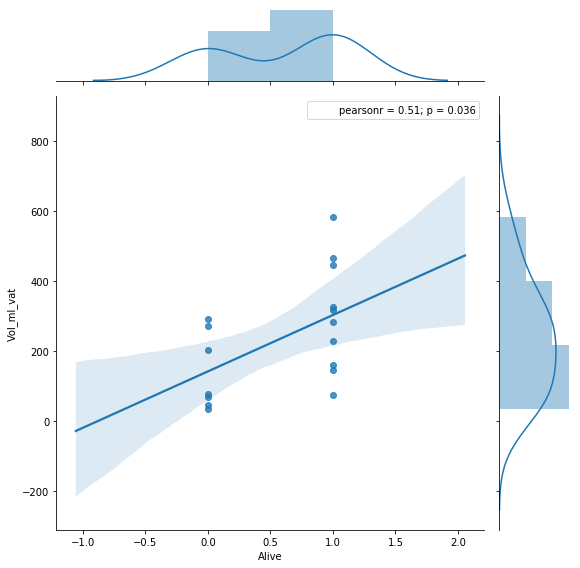

In [25]:
j = sns.jointplot('Alive', 'Vol_ml_vat', data = generic_dat, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

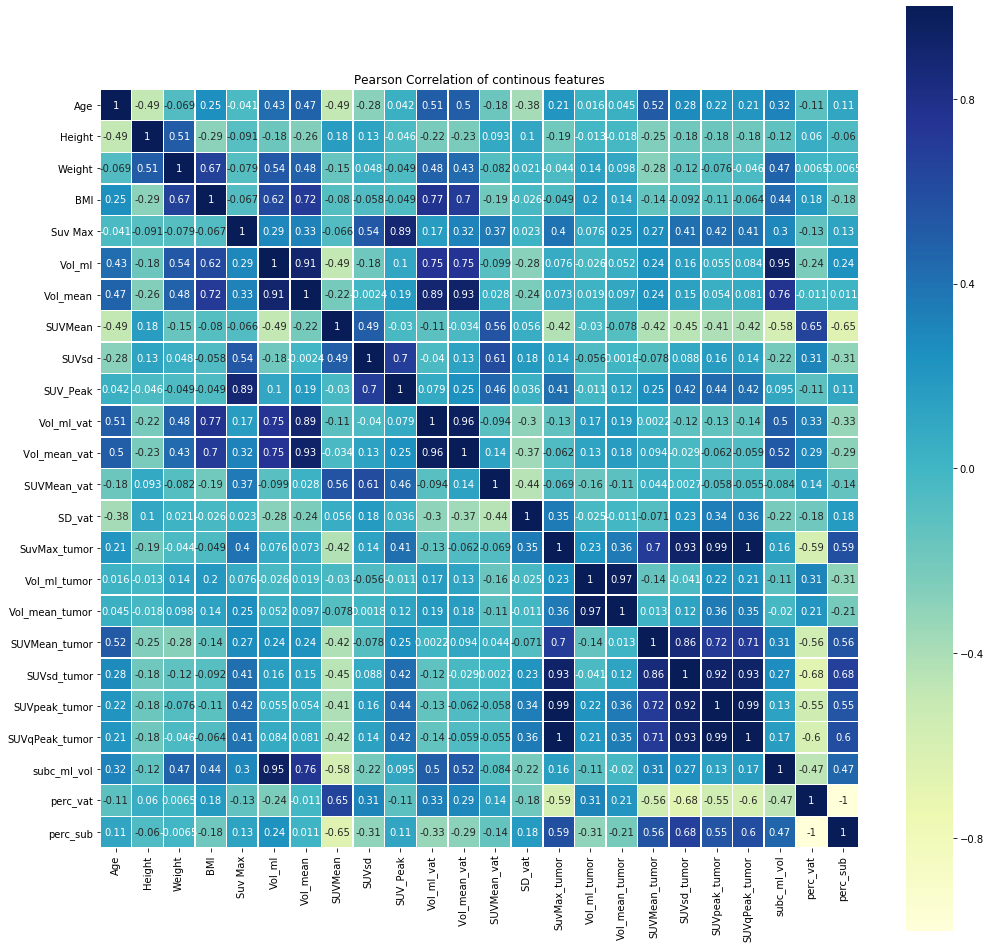

In [16]:
#percentile = generic_dat.drop(['Suv Max', 'SUVMean', 'SUVsd', 'SUV_Peak', ' SUVMean_vat', ' SD_vat', 'SuvMax_tumor', 'SUVMean_tumor', 'SUVsd_tumor', 'SUVpeak_tumor','SUVqPeak_tumor', 'Race', 'Stage'], axis=1)
#normalized_data=(percentile-percentile.mean())/percentile.std()

continous = generic_dat.drop(['Alive', 'Male', 'Race', 'Stage'], axis=1)
#normalized_data=(percentile-percentile.mean())/percentile.std()

cont_variables_correlation = ((continous-continous.mean())/continous.std()).corr()

plt.subplots(figsize=(17, 17))
plt.title('Pearson Correlation of continous features')
ax = sns.heatmap(cont_variables_correlation, 
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu",
                 square=True
                )

<Figure size 1224x1224 with 0 Axes>

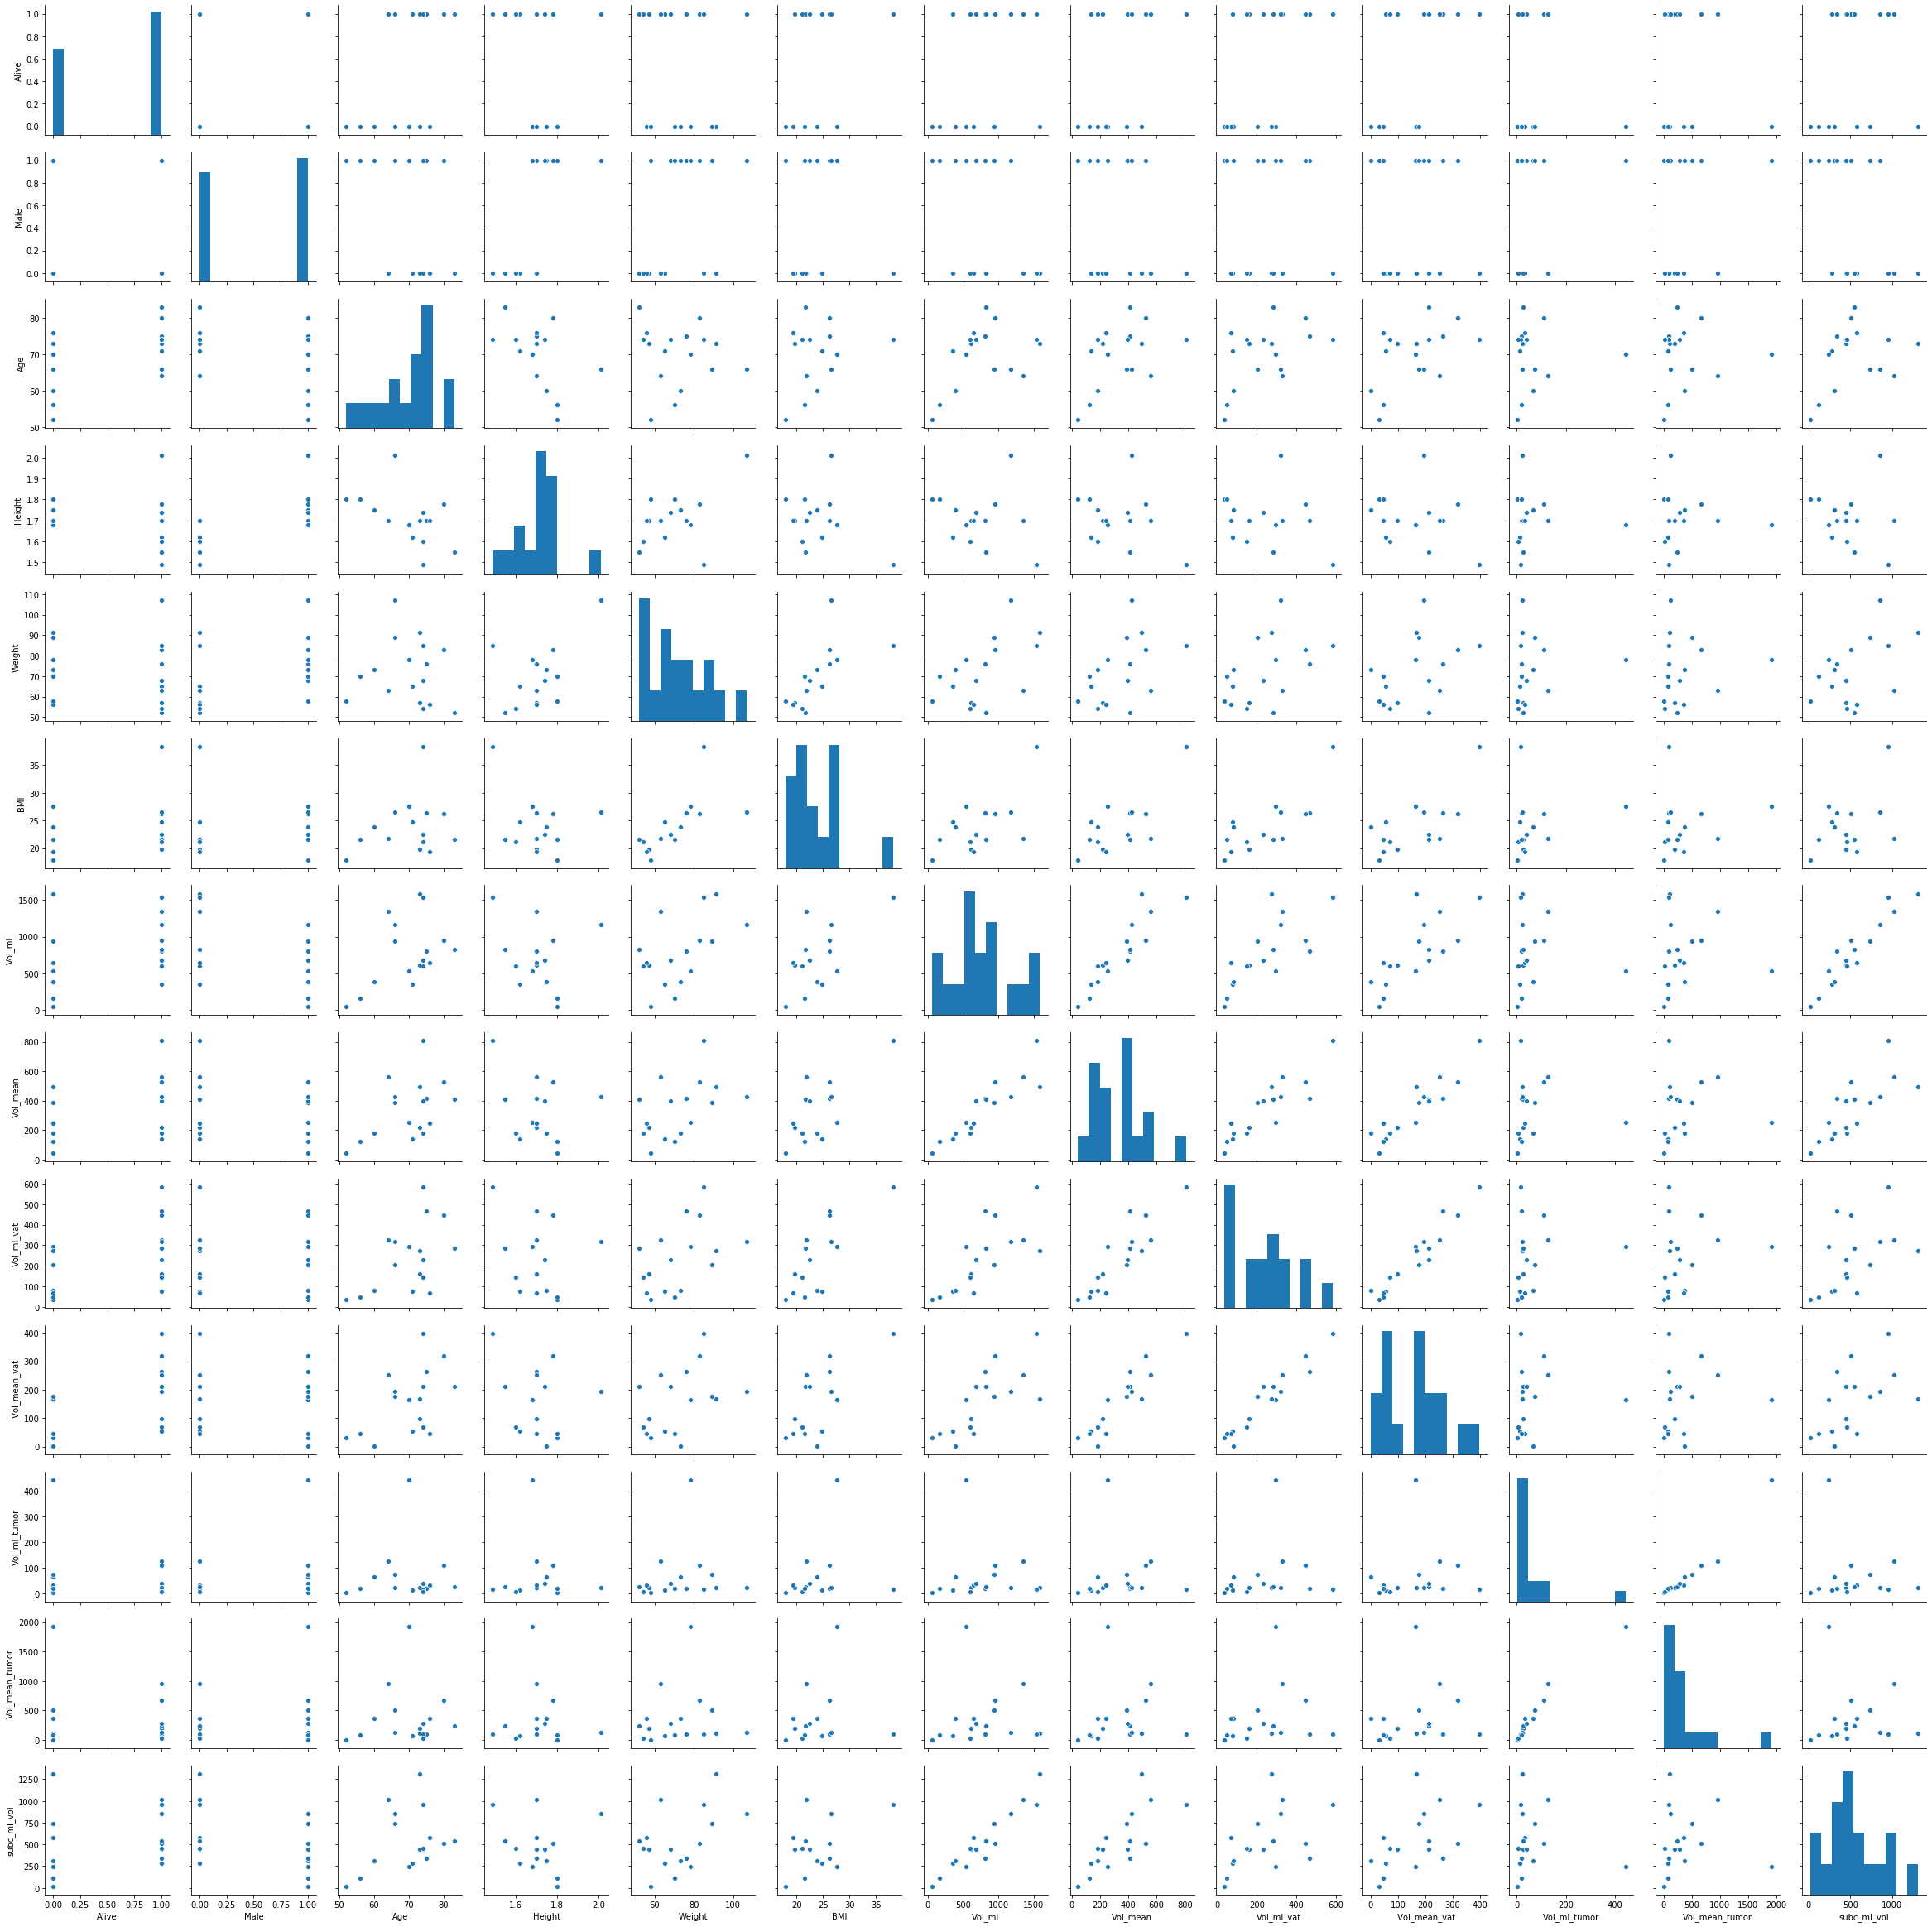

In [12]:
plt.figure(figsize=(17, 17))
sns.pairplot(percentile)

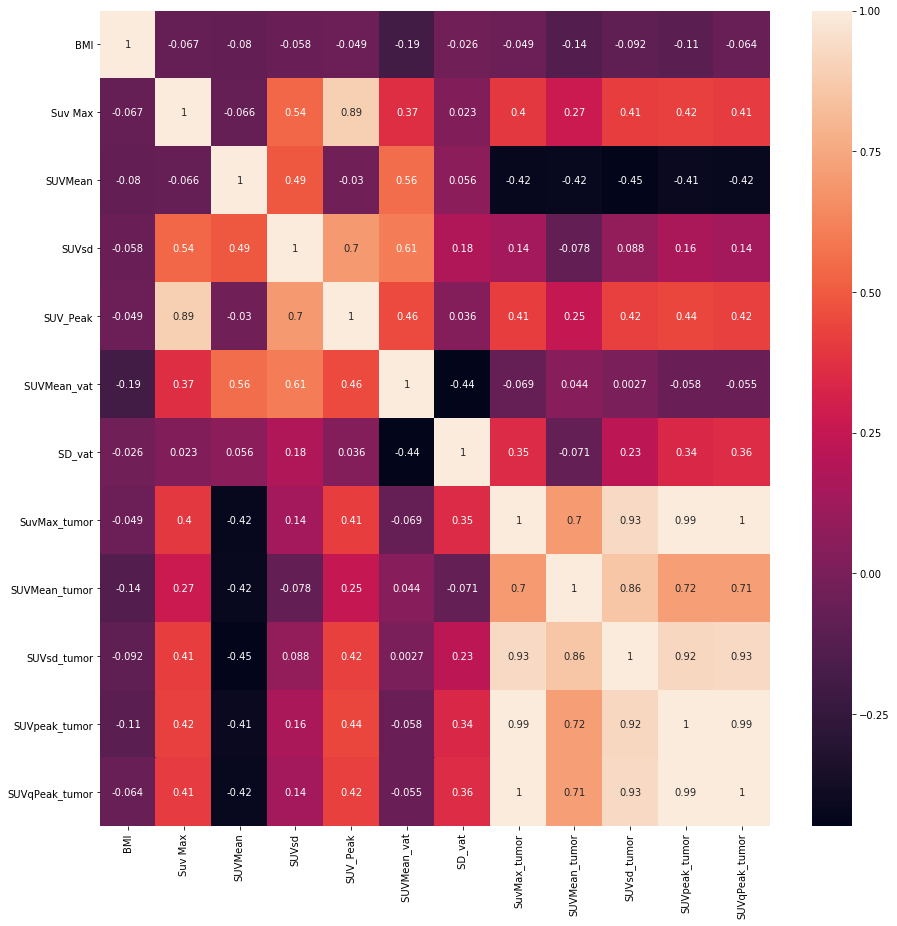

In [29]:
plt.figure(figsize=(15, 15))
sns.heatmap(continous.drop(['Age', 'Height', 'Weight', 'Vol_ml', 'Vol_mean', 'Vol_ml_vat', ' Vol_mean_vat', 'Vol_ml_tumor', 'Vol_mean_tumor', 'subc_ml_vol'], axis=1).corr(), annot=True)
#plt.savefig("corr_age.png")

PCA probably should be done

In [2]:
data_normal = pd.read_csv('csvnormal-sec9.csv')#('csv_tumorAdiposevolume.csv')
data_normal.rename(columns=data_normal.iloc[0])
data_normal = data_normal[0:]
data_normal.reset_index()
data_normal['subc_ml_vol'] = data_normal['Vol_ml'] - data_normal['Vol_ml_vat']
data_normal

,Name,Suvmax_heart,Vol_ml_heart,Vol_mean_heart,SUVMean_heart,SD_heart,Suvmax_liver,Vol_ml_liver,Vol_mean_liver,SUVMean_liver,...,SUVMean_vat,SD_vat,SuvMax_tumor,Vol_ml_tumor,Vol_mean_tumor,SUVMean_tumor,SUVsd_tumor,SUVpeak_tumor,SUVqPeak_tumor,subc_ml_vol
0,TCGA-34-2609,10.52,12.43,44.21,3.56,1.68,3.62,8.05,20.44,2.54,...,0.82,0.47,14.11,81.32,601.17,7.39,3.11,11.69,13.74,565.11
1,TCGA-34-5234,2.64,12.13,25.07,2.07,0.26,3.87,9.49,28.61,3.02,...,0.73,0.56,17.07,11.74,73.79,6.29,4.11,15.07,16.33,282.34
2,TCGA-34-5239,1.81,12.22,18.10,1.48,0.44,2.20,9.98,19.46,1.95,...,0.57,0.29,10.13,20.15,93.78,4.66,2.19,9.01,9.59,340.23
3,TCGA-34-5240,11.65,10.76,54.12,5.03,2.77,2.16,12.71,19.21,1.51,...,0.60,0.29,16.38,24.25,200.64,8.27,3.84,14.91,15.63,447.82
4,TCGA-34-7107,4.36,10.76,22.08,2.05,0.77,2.32,9.49,15.94,1.68,...,0.56,0.26,15.18,443.22,1919.06,4.33,2.18,13.09,14.23,241.96
5,TCGA-34-A5IX,7.60,12.81,45.82,3.58,1.59,2.79,13.79,21.72,1.58,...,0.72,0.38,14.63,111.59,668.33,5.99,3.16,12.86,13.85,508.45
6,TCGA-51-4079,16.42,12.75,113.09,8.87,3.87,2.53,9.28,15.50,1.67,...,0.62,0.22,11.14,22.70,112.52,4.96,2.36,8.75,10.78,1315.12
7,TCGA-51-4080,2.24,16.35,27.34,1.67,0.24,2.42,10.93,20.83,1.91,...,0.86,0.58,22.34,74.04,512.19,6.92,4.90,20.64,21.66,738.02
8,TCGA-60-2695,3.38,9.27,25.02,2.70,0.27,3.87,13.72,38.13,2.78,...,0.68,0.31,12.18,15.59,100.58,6.45,3.00,9.28,11.46,957.41
9,TCGA-60-2696,12.72,10.78,89.08,8.27,2.29,2.42,8.77,16.32,1.86,...,0.67,0.25,20.61,31.97,358.74,11.22,5.88,18.70,20.01,576.03


In [3]:
data_normal.columns

Index(['Name', 'Suvmax_heart', 'Vol_ml_heart', 'Vol_mean_heart',
       'SUVMean_heart', 'SD_heart', 'Suvmax_liver', 'Vol_ml_liver',
       'Vol_mean_liver', 'SUVMean_liver', 'SD_liver', 'Suvmax_deltoid',
       'Vol_ml_deltoid', 'Vol_mean_deltoid', 'SUVMean_deltoid', 'SD_deltoid',
       'Suvmax_scwat', 'Vol_ml_scwat', 'Vol_mean_scwat', 'SUVMean_scwat',
       'SD_scwat', 'Suvmax_brain', 'Vol_ml_brain', 'Vol_mean_brain',
       'SUVMean_brain', 'SD_brain', 'Alive', 'Male', 'Race', 'Age', 'Stage',
       'Height', 'Weight', 'BMI', 'Suv Max', 'FFM', 'FM', 'WBM', 'Vol_ml',
       'Vol_mean', 'SUVMean', 'SUVsd', 'SUV_Peak', 'Vol_ml_vat',
       ' Vol_mean_vat', ' SUVMean_vat', ' SD_vat', 'SuvMax_tumor',
       'Vol_ml_tumor', 'Vol_mean_tumor', 'SUVMean_tumor', 'SUVsd_tumor',
       'SUVpeak_tumor', 'SUVqPeak_tumor', 'subc_ml_vol'],
      dtype='object')

Alive, Male dich
race nominal
stage ordinal

continous pearson
if monotonic and ordinal then spearman
same with kendall
point cont with dich


In [17]:
mask = np.zeros_like(data_cont.corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
data_cont = data_normal.drop(['Alive', 'Male', 'Race', 'Stage'], axis=1)
plt.figure(figsize=(200, 200))
sns.heatmap(data_cont.corr(method='pearson'), annot=True, vmin=-1, cmap='coolwarm', mask=mask)
plt.savefig("corr_mask.png")

In [20]:
data_cont.corr(method='pearson').to_csv(r'corr.csv')

In [4]:
data_cont = data_normal.drop(['Alive', 'Male', 'Race', 'Stage'], axis=1)
data_cont.corr(method='pearson')[data_cont.corr(method='pearson')>0.49].to_csv(r'corr_posfullwomuscle.csv')
data_cont.corr(method='pearson')[data_cont.corr(method='pearson')<-0.49].to_csv(r'corr_negfullwomuscle.csv')

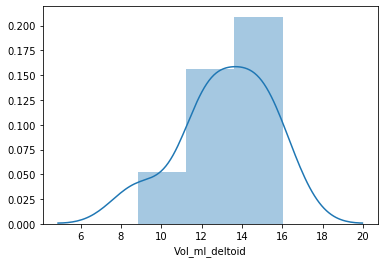

In [17]:
sns.distplot(data_normal['Vol_ml_deltoid'])

In [22]:
sns.lmplot(x=data_normal['Vol_ml_deltoid'], y=data_normal['SUVMean'], hue=data_normal['Alive'])

TypeError: lmplot() missing 1 required positional argument: 'data'

In [3]:
data = pd.read_csv('general_data.csv')
data

,Name,Suvmax_heart,Vol_ml_heart,Vol_mean_heart,SUVMean_heart,SD_heart,Suvmax_liver,Vol_ml_liver,Vol_mean_liver,SUVMean_liver,...,SuvMax_oblL,Vol_ml_oblL,Volmean_oblL,SUVMean_oblL,SD_oblL,SuvMax_rec,Vol_ml_rec,Volmean_rec,SUVMean_rec,SD_rec
0,TCGA-34-2609,10.52,12.43,44.21,3.56,1.68,3.62,8.05,20.44,2.54,...,0.88,20.40,11.12,0.55,0.13,1.07,10.47,5.48,0.52,0.18
1,TCGA-34-5234,2.64,12.13,25.07,2.07,0.26,3.87,9.49,28.61,3.02,...,1.12,13.10,8.83,0.67,0.20,1.03,7.53,3.91,0.52,0.18
2,TCGA-34-5239,1.81,12.22,18.10,1.48,0.44,2.20,9.98,19.46,1.95,...,2.73,16.04,10.16,0.63,0.27,2.16,14.08,13.37,0.95,0.40
3,TCGA-34-5240,11.65,10.76,54.12,5.03,2.77,2.16,12.71,19.21,1.51,...,0.71,8.12,3.91,0.48,0.11,0.82,8.41,4.57,0.54,0.10
4,TCGA-34-7107,4.36,10.76,22.08,2.05,0.77,2.32,9.49,15.94,1.68,...,0.95,24.16,13.61,0.56,0.14,0.92,16.72,7.97,0.48,0.13
5,TCGA-34-A5IX,7.60,12.81,45.82,3.58,1.59,2.79,13.79,21.72,1.58,...,1.34,16.53,11.16,0.67,0.20,0.84,6.45,3.38,0.52,0.11
6,TCGA-51-4079,16.42,12.75,113.09,8.87,3.87,2.53,9.28,15.50,1.67,...,0.81,14.44,5.70,0.39,0.14,1.24,7.76,3.88,0.50,0.19
7,TCGA-51-4080,2.24,16.35,27.34,1.67,0.24,2.42,10.93,20.83,1.91,...,2.18,20.15,9.16,0.45,0.25,1.44,10.55,7.26,0.69,0.23
8,TCGA-60-2695,3.38,9.27,25.02,2.70,0.27,3.87,13.72,38.13,2.78,...,1.43,16.53,11.34,0.69,0.21,0.80,5.17,2.74,0.53,0.14
9,TCGA-60-2696,12.72,10.78,89.08,8.27,2.29,2.42,8.77,16.32,1.86,...,1.60,14.08,10.74,0.76,0.25,0.83,4.67,2.16,0.46,0.16


In [10]:
CATEGORICAL_VARIABLES = ["Alive", 
                       "Male"]

for c in CATEGORICAL_VARIABLES:
    if c not in ["Alive", "Male"]:
        correlation = stats.pointbiserialr(data.drop(data.index[16])[c], data.drop(data.index[16])["FFM"])
    else:
        correlation = stats.pointbiserialr(data.drop(data.index[16])[c], data.drop(data.index[16])["FFM"])
    print("Correlation of %s to Vol_ml_deltoid is %s" %(c, correlation))

Correlation of Alive to Vol_ml_deltoid is PointbiserialrResult(correlation=-0.28945015511859873, pvalue=0.2768720633054648)
Correlation of Male to Vol_ml_deltoid is PointbiserialrResult(correlation=0.7755650497777087, pvalue=0.00041487368937511554)
